In [1]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl

plt.style.use('paper')

In [71]:
inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits'
inputfile_cont = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/cont_12mtp_final_filled.fits'
inputfile_meerkat = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
inputfile_meerkatalpha = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/MeerKAT_Galactic_Centre_alpha.fits'
inputfile_xray = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/GC_GB_fs23.fits'

hdu_max = fits.open(inputfile_max)[0]
hdu_cont = fits.open(inputfile_cont)[0]
hdu_meerkat = fits.open(inputfile_meerkat)[0]
hdu_meerkatalpha = fits.open(inputfile_meerkatalpha)[0]
hdu_meerkatalpha_masked = hdu_meerkatalpha.copy()
hdu_meerkatalpha_masked.data[~np.isnan(hdu_meerkatalpha_masked.data)] = 1
hdu_meerkatalpha_masked.data[np.isnan(hdu_meerkatalpha_masked.data)] = 0
hdu_xray = fits.open(inputfile_xray)[0]

No contour levels were found within the data range.
No contour levels were found within the data range.


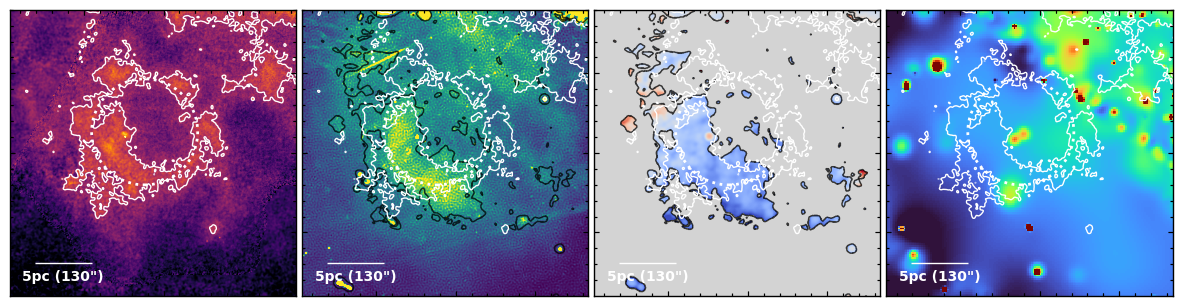

In [100]:
l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(15, 5)) 

ax = ['']*4

ax[0] = aplpy.FITSFigure(hdu_cont, figure=fig, subplot=(1,4,1))
ax[1] = aplpy.FITSFigure(hdu_meerkat, figure=fig, subplot=(1,4,2))
ax[2] = aplpy.FITSFigure(hdu_meerkatalpha, figure=fig, subplot=(1,4,3))
ax[3] = aplpy.FITSFigure(hdu_xray, figure=fig, subplot=(1,4,4))
  
vmin, vmax = np.nanpercentile(hdu_cont.data, [3,99.8])
ax[0].show_colorscale(cmap='inferno', vmin=vmin, vmax=vmax, stretch='linear')

vmin, vmax = -0.00025, 0.0002
ax[1].show_colorscale(cmap='viridis', vmin=vmin, vmax=vmax, stretch='power', exponent=2)

vmin, vmax = -2, 2
ax[2].show_colorscale(cmap='coolwarm', vmin=vmin, vmax=vmax, stretch='linear')

vmin, vmax = np.nanpercentile(hdu_xray.data, [5,99.5])
ax[3].show_colorscale(cmap='turbo', vmin=vmin, vmax=vmax, stretch='linear')

ax[1].show_contour(hdu_meerkatalpha_masked, levels=[0], colors='black', linewidths=1, filled=False, alpha=0.75)
ax[2].show_contour(hdu_meerkatalpha_masked, levels=[0], colors='black', linewidths=1, filled=False, alpha=0.75)

for i in range(4):
    
    ax[i].recenter(l, b, width=width, height=height)
    ax[i].tick_labels.hide()
    ax[i].axis_labels.hide()
    ax[i].ticks.set_color('black')
    ax[i].show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10)
    ax[i].set_nan_color('lightgrey')
    ax[i].add_scalebar(130*u.arcsec, corner='bottom left', color='white')
    ax[i].scalebar.set_label('5pc (130")')
    
    ax[i].show_contour(hdu_cont, levels=[2e-3], colors='white', linewidths=1, smooth=11, convention='wells')
    # ax[i].show_contour(hdu_cont, levels=[3.5e-3], colors='black', linewidths=1, smooth=11, convention='wells')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/multiwave.pdf')

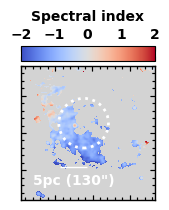

In [105]:
l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(2, 2)) 

ax = ['']*1

ax[0] = aplpy.FITSFigure(hdu_meerkatalpha, figure=fig, subplot=(1,1,1))
vmin, vmax = -2, 2
ax[0].show_colorscale(cmap='coolwarm', vmin=vmin, vmax=vmax, stretch='linear')

for i in range(1):
    
    ax[i].recenter(l, b, width=width, height=height)
    ax[i].tick_labels.hide()
    ax[i].axis_labels.hide()
    ax[i].ticks.set_color('black')
    ax[i].show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10)
    ax[i].set_nan_color('lightgrey')
    ax[i].add_scalebar(130*u.arcsec, corner='bottom left', color='white')
    ax[i].scalebar.set_label('5pc (130")')
    
    
    ax[i].add_colorbar()
    ax[i].colorbar.set_width(0.15)
    ax[i].colorbar.set_location('top')
    ax[i].colorbar.set_ticks([-2,-1,0,1,2])
    ax_cbar = fig.get_axes()[-1]
    ax_cbar.xaxis.set_ticks_position('top')
    
    ax[i].colorbar.set_axis_label_text('Spectral index')
    
fig.subplots_adjust(wspace=0.02, hspace=0.02)
fig.savefig('../figures/multiwave_spectralindex.pdf')